In [1]:
import pandas as pd
import pingouin as pg
from pandas import ExcelWriter
from scipy import stats
import numpy as np

In [52]:
itk_auto_csv = r'C:\Users\NEW-PC-1\Documents\microCT\Dataset\Analysis\auto_itk\ctan_preprocessing_thresholding_output.csv'
itk_manual_csv = r'C:\Users\NEW-PC-1\Documents\microCT\Dataset\Analysis\manual_itk\ctan_preprocessing_thresholding_output.csv'
ctan_manual_csv = r'C:\Users\NEW-PC-1\Documents\microCT\Dataset\Analysis\manual_ctan\analysis_total_ctan.csv'

analysis_csv = r'C:\Users\NEW-PC-1\Documents\microCT\Dataset\Analysis\summary_february_2022\itk_auto_v_auto_no_bvtv.xlsx'

splits_csv = r'C:\Users\NEW-PC-1\Documents\microCT\Dataset\original_res\microCT_osteo_data.csv'

In [53]:
itk_auto_df = pd.read_csv(itk_auto_csv)
itk_manual_df = pd.read_csv(itk_manual_csv)
ctan_manual_df = pd.read_csv(ctan_manual_csv)
train_val_df = pd.read_csv(splits_csv)

In [54]:
itk_auto_df['method'] = pd.Series(["itk_auto" for x in range(len(itk_auto_df.index))])
itk_manual_df['method'] = pd.Series(["itk_manual" for x in range(len(itk_manual_df.index))])
ctan_manual_df['method'] = pd.Series(["ctan_manual" for x in range(len(ctan_manual_df.index))])

In [55]:
#itk_auto_df = itk_auto_df.drop(columns=['BSBV', 'Threshold level'])
#itk_manual_df = itk_manual_df.drop(columns=['BSBV', 'Threshold level'])

In [56]:
# fix file names for later filtering of val/train
itk_manual_df['Name'] = itk_manual_df['Name'].str.replace('.nii','')
itk_auto_df['Name'] = itk_auto_df['Name'].str.replace('.nii','')
ctan_manual_df['Name'] = ctan_manual_df['Name'].str.replace('.nii','')

C:\Users\NEW-PC-1\anaconda3\envs\microct\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\NEW-PC-1\anaconda3\envs\microct\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NEW-PC-1\anaconda3\envs\microct\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [57]:
# find the validation names
val_names = train_val_df.loc[train_val_df['cross_fold_number'] != 0 ] 

# filter for validation split
itk_manual_df_val = itk_manual_df[itk_manual_df.Name.isin(val_names['sample_name'].values)]
itk_auto_df_val = itk_auto_df[itk_auto_df.Name.isin(val_names['sample_name'].values)]


In [73]:
itk_manual_df

Name        BV        TV      BVTV       TbN      TbTh      TbSp  \
0   G1M1  1.227023  2.334201  0.528994  5.299842  0.099813  0.088872   
1   G1M2  1.182027  2.379978  0.500127  5.529478  0.090447  0.090402   
2   G1M3  1.083969  2.214732  0.492808  5.616509  0.087743  0.090304   
3   G1M4  1.157745  2.207766  0.527367  5.193348  0.101547  0.091007   
4   G1M5  1.026395  2.195210  0.470720  5.532397  0.085084  0.095669   
..   ...       ...       ...       ...       ...       ...       ...   
57  G8M3  1.023991  2.341271  0.440377  6.412101  0.068679  0.087276   
58  G8M4  0.904504  2.093044  0.435018  6.034337  0.072090  0.093628   
59  G8M5  0.858485  2.240000  0.386809  6.399397  0.060445  0.095820   
60  G8M6  0.887076  1.866654  0.478469  5.819693  0.082215  0.089615   
61  G8M7  1.019338  2.082651  0.492656  5.716050  0.086188  0.088758   

         BSBV  Threshold level      method  
0   20.037418               96  itk_manual  
1   22.112310               96  itk_manual  
2   22.793886               96  itk_manual  
3   19.695374               96  itk_manual  
4   23.506119               96  itk_manual  
..        ...              ...         ...  
57  29.120959               96  itk_manual  
58  27.742956               96  itk_manual  
59  33.088174               96  itk_manual  
60  24.326332               96  itk_manual  
61  23.205035               96  itk_manual  

[62 rows x 10 columns]

In [67]:
ctan_manual_df

Name       TV       BV      BVTV      TbN     TbTh     TbSp      BSBV  \
0   G1M1  1.46574  2.34447  0.625190  4.29769  0.14547  0.15976  27.96510   
1   G1M2  1.41175  2.38977  0.590747  4.70131  0.12566  0.16086  30.28649   
2   G1M3  1.25822  2.23909  0.561934  4.46813  0.12576  0.15515  32.90889   
3   G1M4  1.34073  2.21814  0.604439  4.27719  0.14132  0.16462  29.35886   
4   G1M5  1.16768  2.23595  0.522230  4.40480  0.11856  0.16653  35.43503   
..   ...      ...      ...       ...      ...      ...      ...       ...   
57  G8M3  1.22778  2.38304  0.515216  5.69345  0.09049  0.15809  40.55113   
58  G8M4  1.04503  2.22256  0.470192  4.92555  0.09546  0.15558  42.04314   
59  G8M5  1.05036  2.34170  0.448546  5.40486  0.08299  0.15809  45.70008   
60  G8M6  1.02323  1.97112  0.519111  4.98963  0.10404  0.16325  37.30633   
61  G8M7  1.15721  2.18314  0.530067  4.63449  0.11437  0.16053  36.00676   

         method  
0   ctan_manual  
1   ctan_manual  
2   ctan_manual  
3   ctan_manual  
4   ctan_manual  
..          ...  
57  ctan_manual  
58  ctan_manual  
59  ctan_manual  
60  ctan_manual  
61  ctan_manual  

[62 rows x 9 columns]

In [61]:
frames = [itk_manual_df, itk_auto_df]
total_df = pd.concat(frames)

In [62]:
columns = ['BV', 'TV', 'BVTV', 'TbN', 'TbTh', 'TbSp', 'BSBV'] 
analysis_dfs = []

### ICC

In [63]:
for column in columns:
    icc = pg.intraclass_corr(data=total_df, targets='Name',\
                             raters='method', ratings=column)
    icc.set_index('Type')
    analysis_dfs.append(icc)
    

In [64]:
def save_xls(list_dfs, xls_path):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer,'%s' % columns[n],engine='xlsxwriter')
        writer.save()

In [65]:
save_xls(analysis_dfs, analysis_csv)

# linear regression

In [75]:
from scipy.stats import linregress
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

BV
SpearmanrResult(correlation=0.6515826848983909, pvalue=9.728549382703247e-09)


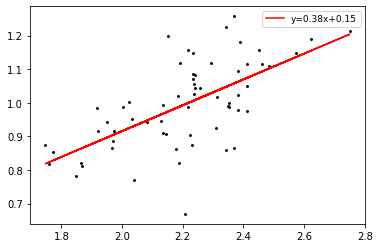

TV
SpearmanrResult(correlation=0.7303517916949963, pvalue=1.6201292764872712e-11)


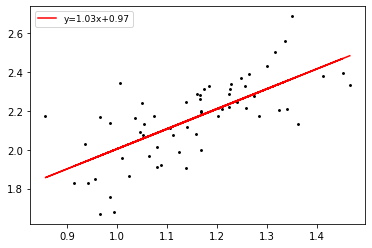

BVTV
SpearmanrResult(correlation=0.9067764599229433, pvalue=3.5222005900154895e-24)


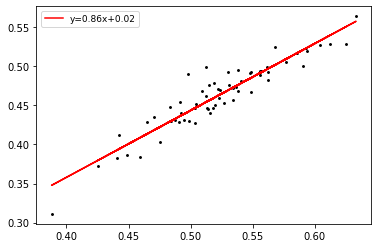

TbN
SpearmanrResult(correlation=0.7032056609000025, pvalue=1.8567682448318186e-10)


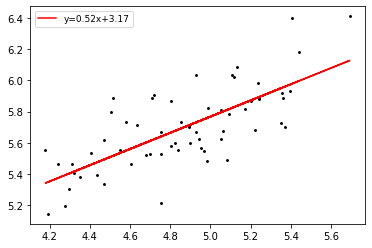

TbTh
SpearmanrResult(correlation=0.8752848743469662, pvalue=1.3689366070445758e-20)


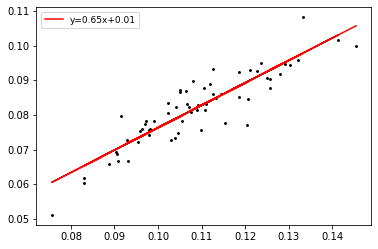

TbSp
SpearmanrResult(correlation=0.6034172322660109, pvalue=2.0909970248113403e-07)


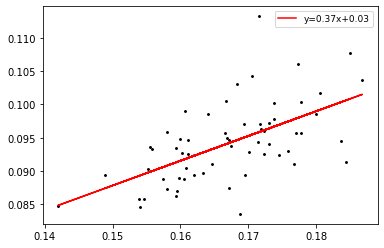

BSBV
SpearmanrResult(correlation=0.9026466218428144, pvalue=1.2168397259830331e-23)


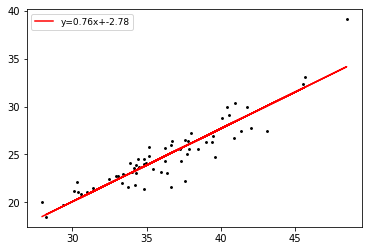

In [76]:
for column in columns:
    print(column)
    x = ctan_manual_df[column]
    y = itk_manual_df[column]
    print(spearmanr(x,y))
    slope, intercept, r, p, se = linregress(x, y)

    
    line = slope*x+intercept
    plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    #end

    plt.scatter(x,y, color="k", s=3.5)
    plt.legend(fontsize=9)

    plt.show()

### outlier robust linear regression

In [234]:
def print_robust_lin_reg(x, y, name):

    slope, intercept = stats.siegelslopes(x,y)
    print('----------------')
    print(name)
    print ("slope:", slope)
    print ("intercept:", intercept)
    print('----------------')
    

In [230]:
def print_lin_reg(x, y, name):

    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print('----------------')
    print(name)
    print ("slope:", slope)
    print ("intercept:", intercept)
    print ("p_value:", p_value)
    print ("r-squared:", r_value**2)
    print('----------------')
    

In [231]:
omit_outliers = False
if omit_outliers:
        all_vals = np.concatenate([frame[columns].to_numpy() for frame in frames], axis= 1)
        z_scores = stats.zscore(all_vals)
        filtered_entries = (np.abs(z_scores) < 3).all(axis=1)
        all_vals = all_vals.reshape((62*3,6))
        filtered_entries_all = np.repeat(filtered_entries, 3)
        
        total_df['filter'] = filtered_entries_all
        total_df_new = total_df[total_df['filter']==True].copy()


In [237]:

for n, column in enumerate(columns):
    ct_m = total_df[total_df['method']=='ctan_manual'][column]
    itk_m = total_df[total_df['method']=='itk_manual'][column]    
    itk_a = total_df[total_df['method']=='itk_auto'][column]
    
    print_robust_lin_reg(ct_m, itk_m, 'itk_v_ctan_manual_'+column)
    #print_robust_lin_reg(itk_a, itk_m, 'itk_v_itk_'+column)    

----------------
itk_v_ctan_manual_BV
slope: -0.004116639810024235
intercept: 1.0206726687525367
----------------
----------------
itk_v_ctan_manual_TV
slope: 0.1093921461174355
intercept: 1.990208713464202
----------------
----------------
itk_v_ctan_manual_BVTV
slope: 0.45206259247264896
intercept: 0.2330268635055585
----------------
----------------
itk_v_ctan_manual_TbN
slope: 0.36246836740830835
intercept: 2.4921770291986913
----------------
----------------
itk_v_ctan_manual_TbTh
slope: 0.840842045835519
intercept: 0.027552095425706184
----------------
----------------
itk_v_ctan_manual_TbSp
slope: -0.14028705908843656
intercept: 0.11806485367744092
----------------
